In [1]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import pandas_datareader as pdr


import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
def get_data(ticker):
    data = pdr.get_data_yahoo(ticker, start="2000-01-01").iloc[:-1][['Close']]
    data[f"{ticker}_return"] = np.log(data.Close) - np.log(data.Close).shift(1)
    data = data.dropna()
    data = data[[f"{ticker}_return"]]
    return data

In [3]:
df = get_data('^JKSE')

In [4]:
df

,^JKSE_return
Date,
2000-01-05,-0.032116
2000-01-06,0.015270
2000-01-11,0.010808
2000-01-12,-0.008425
2000-01-13,0.002093
...,...
2022-10-27,0.006766
2022-10-28,-0.005050
2022-10-31,0.006054


In [5]:
def feature_creation(df):
    
    df['date'] = df.index.day
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    df['salary_period'] = ["Gajian" if (date>=25 or date<=5) else "Hari Biasa"  for date in df.date]
    
    return df

In [6]:
df = feature_creation(df)

In [7]:
df

,^JKSE_return,date,month,year,salary_period
Date,,,,,
2000-01-05,-0.032116,5,January,2000,Gajian
2000-01-06,0.015270,6,January,2000,Hari Biasa
2000-01-11,0.010808,11,January,2000,Hari Biasa
2000-01-12,-0.008425,12,January,2000,Hari Biasa
2000-01-13,0.002093,13,January,2000,Hari Biasa
...,...,...,...,...,...
2022-10-27,0.006766,27,October,2022,Gajian
2022-10-28,-0.005050,28,October,2022,Gajian
2022-10-31,0.006054,31,October,2022,Gajian


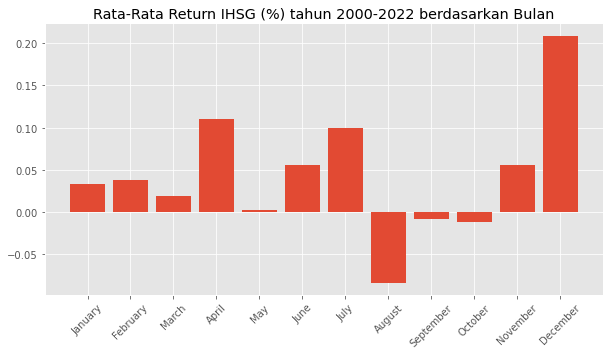

In [13]:
by_month = df.groupby(by="month", sort=False).mean()[['^JKSE_return']]

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x=by_month.index, height=by_month['^JKSE_return']*100)
ax.set_title("Rata-Rata Return IHSG (%) tahun 2000-2022 berdasarkan Bulan")
plt.xticks(rotation=45)

fig.savefig("pic/by_month.png")

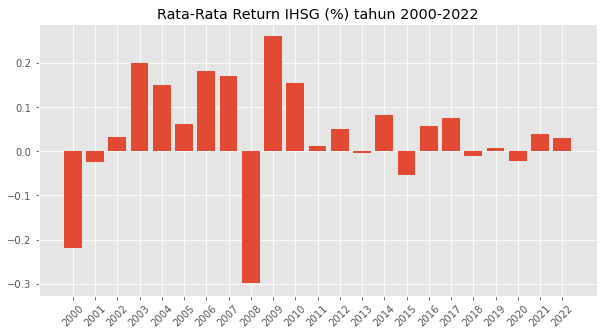

In [9]:
by_year = df.groupby(by="year").mean()[["^JKSE_return"]]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x=by_year.index, height=by_year['^JKSE_return']*100)
ax.set_title("Rata-Rata Return IHSG (%) tahun 2000-2022")
plt.xticks(ticks = by_year.index, rotation=45)

fig.savefig("pic/by_year.png")


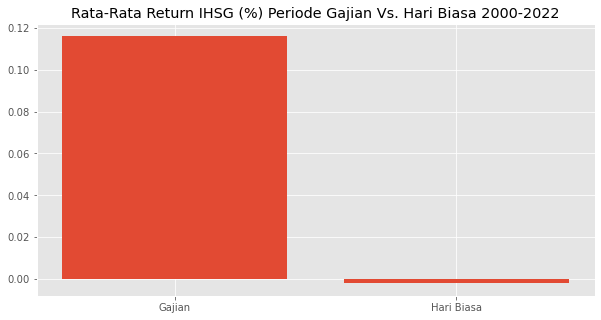

In [11]:
salary_period = df.groupby(by="salary_period").mean()[['^JKSE_return']]

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x=salary_period.index, height=salary_period['^JKSE_return']*100)
ax.set_title("Rata-Rata Return IHSG (%) Periode Gajian Vs. Hari Biasa 2000-2022")

fig.savefig("pic/by_salary_period.png")
